In [1]:
from ifapp.love_dframe import ifapp_df
from ifapp.analize_data import ifapp_Mlearn, ifapp_raster, rasterio
from ifapp.love_dframe import pkl_model_load, pkl_model_save, pd, np
from rasterio import plot

In [2]:
dir_dataframe = r'D:\ix_onepy\Data\Data Excel'
dir_save_model = r'D:\ix_onepy\Data\Data Model'
dir_save_dataframe = r'D:\ix_onepy\Data\Data Excel'

In [3]:
read_data = pd.read_excel(dir_dataframe + "/Data_CC_CidNLine6.xlsx")
read_data.head(4)

,FRCI,B2,B3,B4,B5,B6,B_NDVI,SAVI_.5
0,0.0,0.120041,0.103955,0.097053,0.143030,0.072213,0.191504,0.093186
1,0.0,0.123644,0.110273,0.109867,0.148028,0.090837,0.147971,0.075527
2,0.0,0.124761,0.113850,0.115550,0.161831,0.086320,0.166850,0.089302
3,0.0,0.123704,0.108781,0.104998,0.130728,0.075893,0.109152,0.052458


In [5]:
select_col = ['B2', 'B3', 'B4', 'B5', 'B_NDVI', 'SAVI_.5']
select_row = 'FRCI'
dfx = pd.DataFrame(read_data, columns=select_col)
dfy = np.asarray(read_data[select_row])

clf_model = ifapp_Mlearn.SVR_Model(dfx, dfy, tsize=0.2, rstate=5, ker='rbf')
clf_pred = clf_model.predict(dfx)
rmse_model = ifapp_Mlearn.Model_RMSE(dfy, clf_pred)
r2_model = ifapp_Mlearn.Model_R2(dfy, clf_pred)
print(clf_model)
print('RMSE:', rmse_model, '...', 'R2:', r2_model)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
RMSE: 0.17313383315307837 ... R2: 0.7780181842913884


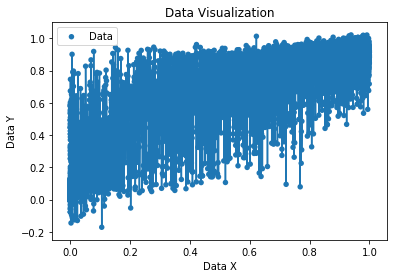

In [7]:
ifapp_Mlearn.plot_data(clf_pred, dfy)
pkl_model_save(clf_model, (dir_save_model + '/Ndvi_Savi.5_rbf.pkl'))